In [1]:
from GQLib.Framework import Framework
from GQLib.Optimizers import MPGA, PSO, SGA, SA, NELDER_MEAD, TABU, FA
from GQLib.enums import InputType
from GQLib.Models import LPPL, LPPLS
from GQLib.AssetProcessor import AssetProcessor
import plotly.graph_objects as go

In [2]:
start_date = "10/04/2006"
end_date = "14/11/2016"

# ETUDE DAILY

In [3]:
fw_wti = Framework('daily', InputType.WTI)
data_wti = fw_wti.select_sample(fw_wti.data, start_date, end_date)
dates_wti = fw_wti.global_dates[data_wti[:, 0].astype(int)]

In [4]:
fw_uso = Framework('daily', InputType.USO)
data_uso = fw_uso.select_sample(fw_uso.data, start_date, end_date)
dates_uso = fw_uso.global_dates[data_uso[:, 0].astype(int)]

In [6]:
fig = go.Figure()

# Ajouter la série WTI
fig.add_trace(
    go.Scatter(
        x=dates_wti,
        y=data_wti[:,1],
        name="WTI",
        mode="lines",
        line=dict(color="blue"),
    )
)

# Ajouter la série USO avec un axe secondaire
fig.add_trace(
    go.Scatter(
        x=dates_uso,
        y=data_uso[:,1],
        name="USO",
        mode="lines",
        line=dict(color="red"),
        yaxis="y2"  # Associe cette trace à l'axe y secondaire
    )
)

# Mise en page pour ajuster les deux axes
fig.update_layout(
    title="daily data of April 10 2006 to November 14, 2016",
    xaxis=dict(title="Date",showline=True, linecolor='black',linewidth=1,mirror=True),
    yaxis=dict(title="WTI daily spot price (dollar per barrel)", titlefont=dict(color="blue"), tickfont=dict(color="blue"),showline=True, linecolor='black',linewidth=1,mirror=True),
    yaxis2=dict(
        title="Daily United States Oil Fund (dollar)",
        titlefont=dict(color="red"),
        tickfont=dict(color="red"),
        overlaying="y",  # Superpose cet axe sur le premier
        side="right"  # Place cet axe à droite
    ),
    legend=dict(x=0.5, y=-0.2, xanchor="center", orientation="h"),
    plot_bgcolor='white', 
    paper_bgcolor='white'
)

# Afficher le graphique
fig.show()

In [10]:

import numpy as np
common_dates = np.intersect1d(dates_wti, dates_uso)

# Filtrer les données de data_wti et data_uso pour ne garder que les dates communes
filtered_wti = data_wti[np.isin(dates_wti, common_dates)]
filtered_uso = data_uso[np.isin(dates_uso, common_dates)]

# Calculer la corrélation entre les prix des deux séries pour les dates communes
correlation = np.corrcoef(filtered_wti[:, 1], filtered_uso[:, 1])[0, 1]

print(f"La corrélation entre WTI et USO est : {correlation}")

La corrélation entre WTI et USO est : 0.6029338170538019


## WEEKLY

In [12]:
fw_wti = Framework('weekly', input_type=InputType.WTI)
data_wti = fw_wti.select_sample(fw_wti.data, start_date, end_date)
fw_uso = Framework('weekly', InputType.USO)
data_uso = fw_uso.select_sample(fw_uso.data, start_date, end_date)
dates_wti = fw_wti.global_dates[data_wti[:, 0].astype(int)]
dates_uso = fw_uso.global_dates[data_uso[:, 0].astype(int)]

In [15]:
fig = go.Figure()

# Ajouter la série WTI
fig.add_trace(
    go.Scatter(
        x=dates_wti,
        y=data_wti[:,1],
        name="WTI",
        mode="lines",
        line=dict(color="blue"),
    )
)

# Ajouter la série USO avec un axe secondaire
fig.add_trace(
    go.Scatter(
        x=dates_uso,
        y=data_uso[:,1],
        name="USO",
        mode="lines",
        line=dict(color="red"),
        yaxis="y2"  # Associe cette trace à l'axe y secondaire
    )
)

# Mise en page pour ajuster les deux axes
fig.update_layout(
    title="weekly data of April 10 2006 to November 14, 2016",
    xaxis=dict(title="Date"),
    yaxis=dict(title="WTI weekly spot price (dollar per barrel)", titlefont=dict(color="blue"), tickfont=dict(color="blue")),
    yaxis2=dict(
        title="Daily United States Oil Fund (dollar)",
        titlefont=dict(color="red"),
        tickfont=dict(color="red"),
        overlaying="y",  # Superpose cet axe sur le premier
        side="right"  # Place cet axe à droite
    ),
    legend=dict(x=0.5, y=-0.2, xanchor="center", orientation="h"),
)

# Afficher le graphique
fig.show()

In [16]:
correlation = np.corrcoef(data_wti[:, 1], data_uso[1:, 1])[0, 1]

print(f"La corrélation entre WTI et USO est : {correlation}")

La corrélation entre WTI et USO est : 0.5978794695728392


### Extension jusqu a ajd

(array([ 3652.,  5479.,  7305.,  9131., 10957., 12784., 14610., 16436.,
        18262., 20089., 21915.]),
 [Text(3652.0, 0, '1980'),
  Text(5479.0, 0, '1985'),
  Text(7305.0, 0, '1990'),
  Text(9131.0, 0, '1995'),
  Text(10957.0, 0, '2000'),
  Text(12784.0, 0, '2005'),
  Text(14610.0, 0, '2010'),
  Text(16436.0, 0, '2015'),
  Text(18262.0, 0, '2020'),
  Text(20089.0, 0, '2025'),
  Text(21915.0, 0, '2030')])

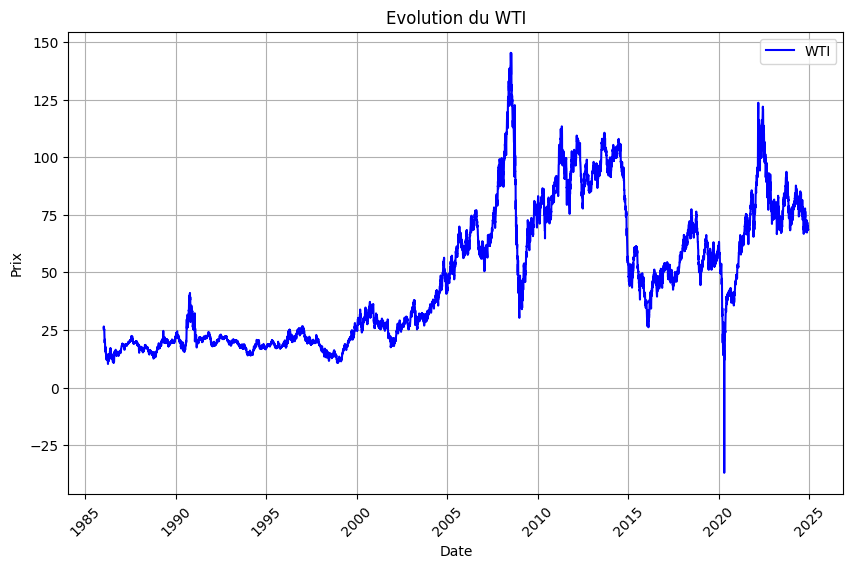

In [9]:
import matplotlib.pyplot as plt
fw_wti = Framework('daily')
plt.figure(figsize=(10, 6))
plt.plot(fw_wti.global_dates, fw_wti.global_prices, label='WTI', color='blue', linestyle='-')
plt.title('Evolution du WTI')
# Ajouter des labels d'axes
plt.xlabel('Date')
plt.ylabel('Prix')
# Ajouter une légende
plt.legend()
# Ajouter une grille
plt.grid(True)
# Formater l'axe des x pour afficher les dates correctement (si ce sont des objets datetime ou Timestamp)
plt.xticks(rotation=45)

(array([18262., 18293., 18322., 18353., 18383., 18414., 18444., 18475.,
        18506., 18536., 18567.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18293.0, 0, '2020-02'),
  Text(18322.0, 0, '2020-03'),
  Text(18353.0, 0, '2020-04'),
  Text(18383.0, 0, '2020-05'),
  Text(18414.0, 0, '2020-06'),
  Text(18444.0, 0, '2020-07'),
  Text(18475.0, 0, '2020-08'),
  Text(18506.0, 0, '2020-09'),
  Text(18536.0, 0, '2020-10'),
  Text(18567.0, 0, '2020-11')])

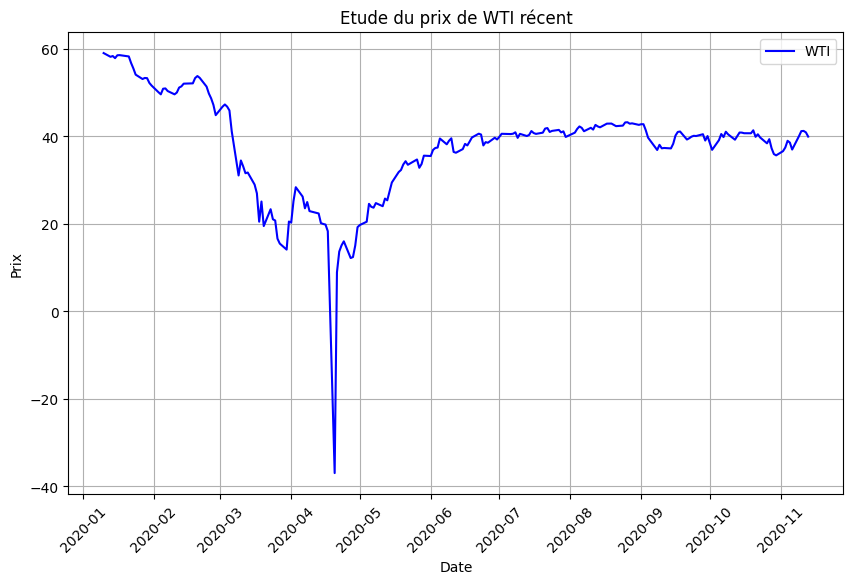

In [14]:
start_date = "10/01/2020"
end_date = "14/11/2020"
fw_wti = Framework('daily')
data_wti = fw_wti.select_sample(fw_wti.data, start_date, end_date)
dates_wti = fw_wti.global_dates[data_wti[:, 0].astype(int)]
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(dates_wti, data_wti[:, 1], label='WTI', color='blue', linestyle='-')
plt.title('Etude du prix de WTI récent')
# Ajouter des labels d'axes
plt.xlabel('Date')
plt.ylabel('Prix')
# Ajouter une légende
plt.legend()
# Ajouter une grille
plt.grid(True)
# Formater l'axe des x pour afficher les dates correctement (si ce sont des objets datetime ou Timestamp)
plt.xticks(rotation=45)